# **QSAR Model Building of Acetylcholinesterase Inhibitors**

Chanin Nantasenamat

*Data Professor YouTube channel, http://youtube.com/dataprofessor*

# Read in data

In [1]:
import pandas as pd

In [2]:
import pandas as pd

# Use a raw string to avoid issues with backslashes
file_path = r"C:\Users\pc\OneDrive\Documents\GitHub\KSI-Drug-Discovery-MgluR5\code-master\python\MgluR5_06_bioactivity_data_3class_pIC50_pubchem_fp.csv"

# Read the CSV file
dataset = pd.read_csv(file_path)

# Display the dataset
print(dataset)


      PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           0           0           0           0   
1              1           1           0           0           0           0   
2              1           1           0           0           0           0   
3              1           1           1           0           0           0   
4              1           1           1           0           0           0   
...          ...         ...         ...         ...         ...         ...   
1967           1           1           1           0           0           0   
1968           1           1           1           0           0           0   
1969           1           1           0           0           0           0   
1970           1           1           0           0           0           0   
1971           1           1           0           0           0           0   

      PubchemFP6  PubchemFP7  PubchemFP

In [3]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1968,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1969,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1970,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0      -1.556303
1      -3.477121
2      -1.000000
3      -5.477121
4      -5.477121
          ...   
1967   -2.678518
1968   -1.431364
1969   -4.477121
1970   -4.096910
1971   -4.000000
Name: pIC50, Length: 1972, dtype: float64

# Remove low variance features

In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP23,PubchemFP33,PubchemFP37,PubchemFP143,PubchemFP145,...,PubchemFP704,PubchemFP707,PubchemFP708,PubchemFP709,PubchemFP710,PubchemFP712,PubchemFP734,PubchemFP755,PubchemFP797,PubchemFP818
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,1,1,0,1,0,1,0
3,1,1,0,1,1,0,0,0,0,0,...,1,0,1,1,1,1,0,0,0,0
4,1,1,0,1,1,0,0,0,0,0,...,1,0,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,1,1,0,1,0,0,0,0,1,1,...,1,0,1,1,1,1,1,1,1,1
1968,1,1,0,1,1,1,0,0,0,0,...,1,1,1,1,1,0,0,0,0,0
1969,0,1,0,1,1,1,0,0,1,1,...,0,0,1,1,1,0,0,0,0,0
1970,0,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X.to_csv('descriptor_list.csv', index = False)

In [7]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8355474934313224

## Model Prediction

In [10]:
Y_pred = model.predict(X)
Y_pred

array([-1.76946845, -2.9026182 , -1.25955298, ..., -3.13089005,
       -3.72729369, -4.11875332])

## Model Performance

In [11]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.23
Coefficient of determination (R^2): 0.84


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

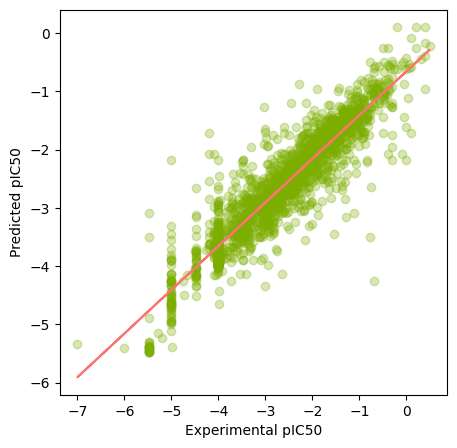

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [14]:
import pickle

In [15]:
pickle.dump(model, open('MgluR5_model.pkl', 'wb'))